In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# Data tentang luas tanah (dalam meter persegi) dan harga rumah (dalam ribu dolar)
rumah = {'luas_tanah': [100, 150, 200, 250, 300], 'harga_rumah': [250, 350, 450, 550, 650]}
rumah_df = pd.DataFrame(rumah)
print(rumah_df)


   luas_tanah  harga_rumah
0         100          250
1         150          350
2         200          450
3         250          550
4         300          650


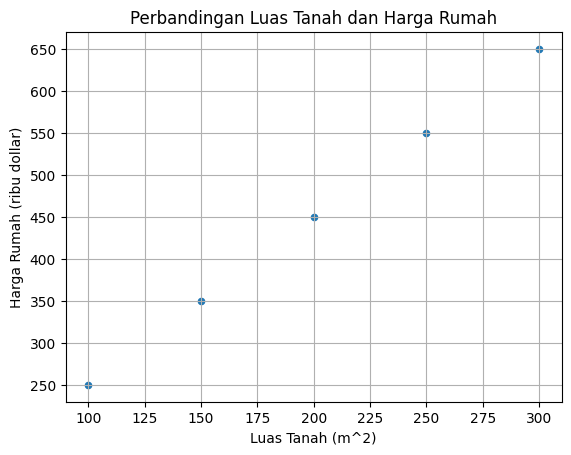

In [3]:
rumah_df.plot(kind='scatter', x='luas_tanah', y='harga_rumah')
plt.title('Perbandingan Luas Tanah dan Harga Rumah')
plt.xlabel('Luas Tanah (m^2)')
plt.ylabel('Harga Rumah (ribu dollar)')
plt.grid(True)
plt.show()


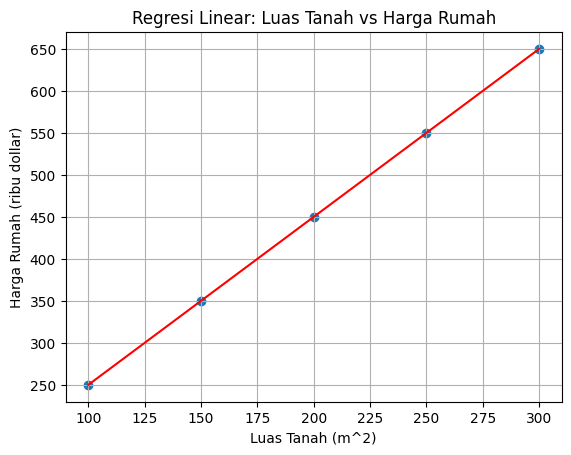

In [4]:
X = np.array(rumah_df['luas_tanah']).reshape(-1, 1)
y = np.array(rumah_df['harga_rumah'])

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regresi Linear: Luas Tanah vs Harga Rumah')
plt.xlabel('Luas Tanah (m^2)')
plt.ylabel('Harga Rumah (ribu dollar)')
plt.grid(True)
plt.show()


In [5]:
# Perhitungan manual
variance_x = np.var(X.flatten(), ddof=1)
covariance_xy = np.cov(X.flatten(), y)[0][1]
slope = covariance_xy / variance_x
intercept = np.mean(y) - slope * np.mean(X)

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')


Slope: 2.0
Intercept: 50.0


In [6]:
luas_tanah_new = np.array([175, 225, 275]).reshape(-1, 1)
harga_rumah_pred = model.predict(luas_tanah_new)

for luas, harga_pred in zip(luas_tanah_new, harga_rumah_pred):
    print(f'Luas Tanah: {luas} m^2, Prediksi Harga Rumah: {harga_pred} ribu dollar')


Luas Tanah: [175] m^2, Prediksi Harga Rumah: 400.00000000000006 ribu dollar
Luas Tanah: [225] m^2, Prediksi Harga Rumah: 500.0 ribu dollar
Luas Tanah: [275] m^2, Prediksi Harga Rumah: 599.9999999999999 ribu dollar


In [7]:
# Evaluasi model
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
print(f'R-squared: {r_squared}')


R-squared: 1.0
